In [1]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import progressbar
import pandas as pd
import time 
import json
import numpy as np

In [2]:
from calculate_level_new import get_level_from_raw_text

In [3]:
def lower(text):
    lower_text = ''
    for word in text.split():
        w = word.lower()
        lower_text += w + ' '
    lower_text = lower_text.strip()
    return lower_text

In [4]:
with open('./texts/texts_lleo_update.json') as json_file:  
    text = []
    set_name = []
    data = json.load(json_file)
    for data_i in data:
        text.append(data_i['text'])
        set_name.append(data_i['name'])
text_level = pd.DataFrame(
    {'text': text,
     'set_name': set_name
    })
text_level['set_name'] = text_level['set_name'].apply(lower)
text_level.head()

,text,set_name
0,Hello! My name is Sonya. It’s early morning. W...,beginner_set
1,This is my friend Jimmy. He is from India. Jim...,beginner_set
2,My name is Sonya. I am 20 and I come from Moro...,beginner_set
3,My mom is a doctor. I know many useful things ...,beginner_set
4,The weather can be very different. Toby and Ro...,beginner_set


In [5]:
set_level_df = pd.read_csv("./texts/set_level_update.csv", sep = ",")
set_level_df['set'] = set_level_df['set'].apply(lower)
set_level_df.head()

,set,level
0,beginner_set,Beginner
1,everyday life stories 1,Elementary/Pre-Intermediate
2,pocahontas,Elementary/Pre-Intermediate
3,robin hood,Elementary/Pre-Intermediate
4,the call of the wild,Elementary/Pre-Intermediate


In [6]:
set(set_level_df['level'])

{'Advanced',
 'Beginner',
 'Elementary/Pre-Intermediate',
 'Intermediate',
 'Upper-Intermediate'}

In [7]:
text = text_level.iloc[2]['text']
print(text)
get_level_from_raw_text(text)

My name is Sonya. I am 20 and I come from Morocco. It is in the North of Africa. I am a student. I study History at the University. I have got many good friends here. They come from different parts of the world. Yuko is from Japan. She speaks Japanese. Laura comes from Italy. She speaks Italian. Toby and Roby come from Canada. They speak English and French. Jimmy is from India. He speaks Hindi and English. When we have long holidays, I miss them very much. I look at the map and say: “Good morning, Yuko and Jimmy! Good afternoon, Laura! Good evening, Toby and Roby!”


'Beginner'

In [8]:
name_dict = pd.Series(set_level_df.level.values,index=set_level_df.set).to_dict()
level_interpret = {'Beginner':0, 'Elementary/Pre-Intermediate':1, 'Intermediate':2, 'Upper-Intermediate':3, 'Advanced':4}

In [9]:
def assign_level(name):
    if name in name_dict:
        return level_interpret[name_dict[name]]
    else:
        return None

text_level['level'] = text_level['set_name'].apply(assign_level)
text_level_no_nan = text_level.dropna()
text_level_no_nan.head()

,text,set_name,level
0,Hello! My name is Sonya. It’s early morning. W...,beginner_set,0.0
1,This is my friend Jimmy. He is from India. Jim...,beginner_set,0.0
2,My name is Sonya. I am 20 and I come from Moro...,beginner_set,0.0
3,My mom is a doctor. I know many useful things ...,beginner_set,0.0
4,The weather can be very different. Toby and Ro...,beginner_set,0.0


In [10]:
text_levels = []
text_ind = 0
for text in text_level_no_nan['text']:
    bar = progressbar.ProgressBar(maxval=len(text_level_no_nan['text']),
                                  widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    
    txt_ft = get_level_from_raw_text(text)
    text_levels.append(txt_ft)
    
    text_ind += 1
    bar.update(text_ind)
    time.sleep(0.1)

In [11]:
#level_interpret_cefr = {'Beginner':0, 'Elementary/Pre-intermediate':1, 'Intermediate':2, 'Upper-Intermediate':3, 'Advanced':4}
def assign_level_cefr(level_name):
    if level_name in level_interpret:
        return level_interpret[level_name]
    else:
        print("wtf??")

In [12]:
text_level_no_nan['script_calc_level'] = text_levels
text_level_no_nan['script_calc_level_int'] = text_level_no_nan['script_calc_level'].apply(assign_level_cefr)
text_level_no_nan['level'] = text_level_no_nan['level'].astype('int64')

text_level_no_nan.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,text,set_name,level,script_calc_level,script_calc_level_int
0,Hello! My name is Sonya. It’s early morning. W...,beginner_set,0,Beginner,0
1,This is my friend Jimmy. He is from India. Jim...,beginner_set,0,Beginner,0
2,My name is Sonya. I am 20 and I come from Moro...,beginner_set,0,Beginner,0
3,My mom is a doctor. I know many useful things ...,beginner_set,0,Beginner,0
4,The weather can be very different. Toby and Ro...,beginner_set,0,Elementary/Pre-Intermediate,1


In [16]:
text_level_no_nan['level_difference'] = text_level_no_nan['script_calc_level_int'] - text_level_no_nan['level']
text_level_no_nan.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,set_name,level,script_calc_level,script_calc_level_int,level_difference
0,Hello! My name is Sonya. It’s early morning. W...,beginner_set,0,Beginner,0,0
1,This is my friend Jimmy. He is from India. Jim...,beginner_set,0,Beginner,0,0
2,My name is Sonya. I am 20 and I come from Moro...,beginner_set,0,Beginner,0,0
3,My mom is a doctor. I know many useful things ...,beginner_set,0,Beginner,0,0
4,The weather can be very different. Toby and Ro...,beginner_set,0,Elementary/Pre-Intermediate,1,1


In [19]:
text_level_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3742 entries, 0 to 3781
Data columns (total 6 columns):
text                     3742 non-null object
set_name                 3742 non-null object
level                    3742 non-null int64
script_calc_level        3742 non-null object
script_calc_level_int    3742 non-null int64
level_difference         3742 non-null int64
dtypes: int64(3), object(3)
memory usage: 204.6+ KB


In [25]:
text_level_no_nan[text_level_no_nan["level_difference"] < 0].to_csv("script_calc_easier.csv", sep = ",")

In [26]:
text_level_no_nan[text_level_no_nan["level_difference"] > 0].to_csv("script_calc_more_diff.csv", sep = ",")

In [18]:
text_level_no_nan[abs(text_level_no_nan["level_difference"] > 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 14 to 3761
Data columns (total 6 columns):
text                     382 non-null object
set_name                 382 non-null object
level                    382 non-null int64
script_calc_level        382 non-null object
script_calc_level_int    382 non-null int64
level_difference         382 non-null int64
dtypes: int64(3), object(3)
memory usage: 20.9+ KB


In [20]:
text_level_no_nan[abs(text_level_no_nan["level_difference"] > 1)].to_csv("misclassified.csv", sep = ",")

In [13]:
text_level_no_nan.to_csv("text_level_cal_update.csv")

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

Confusion matrix, without normalization
[[  6   4   0   0   0]
 [ 52 239  92 115  88]
 [ 63 283 159 196 179]
 [ 31 246 158 179 221]
 [  5 101 286 389 650]]
Precision:   0.26
Recall:   0.37
F1-measure:   0.26
Accuracy:   0.33
Normalized confusion matrix
[[0.6  0.4  0.   0.   0.  ]
 [0.09 0.41 0.16 0.2  0.15]
 [0.07 0.32 0.18 0.22 0.2 ]
 [0.04 0.29 0.19 0.21 0.26]
 [0.   0.07 0.2  0.27 0.45]]
Precision:   0.26
Recall:   0.37
F1-measure:   0.26
Accuracy:   0.33


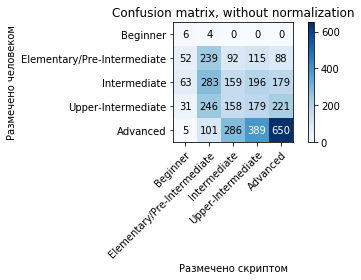

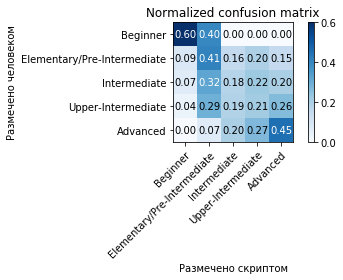

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print("Precision: {0:6.2f}".format(precision_score(y_true, y_pred, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_true, y_pred, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_true, y_pred, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_true, y_pred)))

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Размечено человеком',
           xlabel='Размечено скриптом')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
y_test = text_level_no_nan['level']
y_pred = text_level_no_nan['script_calc_level_int']
classes = ['Beginner', 'Elementary/Pre-Intermediate', 'Intermediate', 'Upper-Intermediate', 'Advanced']
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()